In [4]:
import pandas as pd
from pandas import DataFrame

def load(path: str) -> DataFrame:
    """
    @param path: str
    @return: DataFrame

    @description: Load and print the dimensions of the dataset from the given path.
    """
    try:
        if isinstance(path, str) == False:
            raise ValueError("Path is not a string")
        if path[-4:] != ".csv":
            raise ValueError("Path is not a .csv file")
        df = pd.read_csv(path)
        print("Loading dataset of dimensions",df.shape)
        return df
    except:
        print("Error loading dataset")
        return None

In [37]:
from load_csv import load
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

def adjust_pop(pop):
    if 'K' in pop:
        return float(pop.replace('k', ' ')) / 1000
    elif 'M' in pop:
        return float(pop.replace('M', ' '))
    elif 'B' in pop:
        return float(pop.replace('B', ' ')) * 1000

def show_population_total(dataFrame: DataFrame):
    """
    @param dataFrame: DataFrame
    @return: None

    @description: Show a graph of the population total in the dataset.
    """
    try:
        if isinstance(dataFrame, DataFrame) is False:
            raise ValueError("Data is not a DataFrame")
        countries = ['Morocco', 'France', 'Belgium']
        years = dataFrame.columns[1:-50]
        pop = [dataFrame[dataFrame['country'] == c] for c in countries]
        adjusted_pop = [p.iloc[0, 1:-50].apply(adjust_pop) for p in pop]
        years = [str(year) for year in years]
        max_pop = max([max(country_pop) for country_pop in adjusted_pop])
        if max_pop > 1000:
            y_tick_step = 200
        else:
            y_tick_step = 20
        for adj_p,c in zip(adjusted_pop, countries):
            plt.plot(years, adj_p, label=c)
        y_ticks = np.arange(0, max_pop + 20, y_tick_step)
        y_labels = [f'{int(y)}M' for y in y_ticks]
        plt.yticks(y_ticks, y_labels)
        plt.legend(countries, loc='lower right')
        plt.title("Population Projections")
        plt.xlabel("Year")
        plt.ylabel("Population")
        plt.xticks([
            '1800',
            '1840',
            '1880',
            '1920',
            '1960',
            '2000',
            '2040',
        ])
        plt.show()
    except Exception as e:
        print("Error showing graph", e)

Loading dataset of dimensions (197, 302)


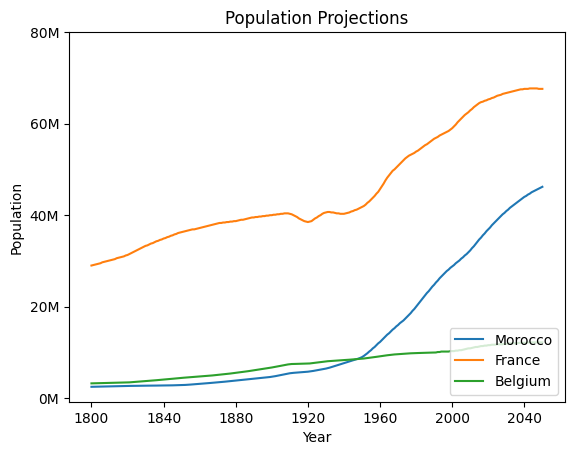

In [38]:
def main():
    show_population_total(load("population_total.csv"))

if __name__ == "__main__":
    main()